In [2]:
pip install requests

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 4.4 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 26.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import requests
import matplotlib.pyplot as plt
import time
import datetime

In [29]:
latitudes = []
longitudes = []
timestamps = []

for _ in range(100):
    response = requests.get("http://api.open-notify.org/iss-now.json")
    data = response.json()

    latitude = float(data["iss_position"]["latitude"])
    longitude = float(data["iss_position"]["longitude"])
    timestamp = int(data["timestamp"])

    latitudes.append(latitude)
    longitudes.append(longitude)
    timestamps.append(timestamp)

    time.sleep(10)

readable_times = [datetime.datetime.fromtimestamp(ts).strftime("%Y-%m-%d %H:%M:%S") for ts in timestamps]

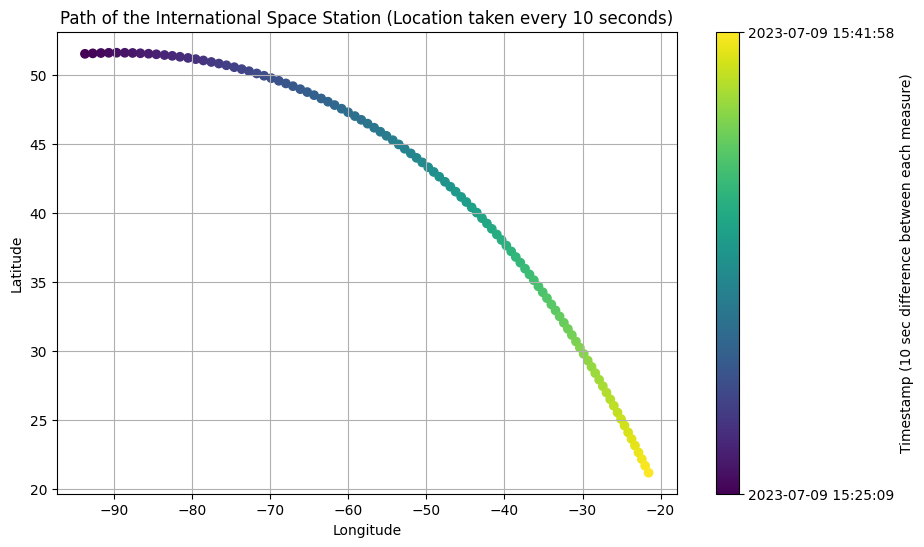

In [33]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(longitudes, latitudes, c=timestamps, cmap="viridis", marker="o")
cbar = plt.colorbar(scatter, label="Timestamp (10 sec difference between each measure)")
cbar.set_ticks([min(timestamps), max(timestamps)])
cbar.set_ticklabels([readable_times[0],readable_times[-1]])
plt.title("Path of the International Space Station (Location taken every 10 seconds)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid(True)
plt.show()